In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [11]:
def pandemic(k,t):
    
    S_H = k[0]
    S_M = k[1]
    S_L = k[2]
    I_H = k[3]
    I_M = k[4]
    I_L = k[5]  
    
    dS_Hdt = -beta_H * (alpha * I_H +         I_M +         I_L) * S_H +  eta_MH * S_M
    dS_Mdt = -beta_M * (        I_H + alpha * I_M +         I_L) * S_M - (eta_MH + eta_ML) * S_M
    dS_Ldt = -beta_L * (        I_H +         I_M + alpha * I_L) * S_L +  eta_ML * S_M
    
    dI_Hdt =  beta_H * (alpha * I_H +         I_M +         I_L) * S_H - gamma_H * I_H 
    dI_Mdt =  beta_M * (        I_H + alpha * I_M +         I_L) * S_M - gamma_M * I_M 
    dI_Ldt =  beta_L * (        I_H +         I_M + alpha * I_L) * S_L - gamma_L * I_L 
    
    return [dS_Hdt, dS_Mdt, dS_Ldt, dI_Hdt, dI_Mdt, dI_Ldt]

In [12]:
#Recovery Rate
gamma_H = 1
gamma_M = 1
gamma_L = 1

#Infection Rate!
beta_H = 1
beta_M = 1
beta_L = 1

#alpha explains how much three groups are isolated 
alpha = 1.2

#how the M group lose its saving and moves to H group
eta_MH = 1/14
eta_ML = 1/14

In [16]:
#Initial conditions and t range
stp = 0.1
t = np.arange(0,15, stp)
k0=[0.6, 0.3, 0.1, 0, 0, 0.00001]

#Solve
k = odeint(pandemic,k0,t)

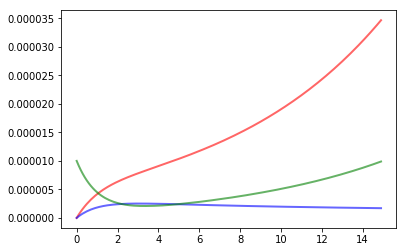

In [17]:
#Plotting
plt.plot(t,k[:,3],'r-', linewidth=2.0, alpha = 0.6)
plt.plot(t,k[:,4],'b-', linewidth=2.0, alpha = 0.6)
plt.plot(t,k[:,5],'g-', linewidth=2.0, alpha = 0.6)
#plt.plot(t,k[:,0],'-', color = 'orange', linewidth=2.0, alpha = 0.6)


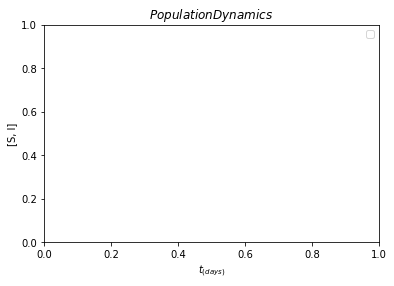

In [15]:
#print(k[20, 0])
plt.title('$Population Dynamics$')
plt.xlabel("$t_{(days)}$")
plt.ylabel("[S, I]")
plt.legend(["$I_H$", "$I_M$", "$I_L$"])
plt.savefig("Plot.png")
plt.show()